# Topic Modeling para cada desafío

En esta notebook se realiza Topic Modeling con una variedad de metodos:

1. Latent Semantic Analysis (LSA)
2. Latent Dirichlet Allocation (LDA)
1. BERTopic

In [1]:
%%capture
!pip install -r requirements.txt --user

In [2]:
import pandas as pd
import regex as re
import unidecode
import nltk
import spacy

path_to_MyModule = '..'

import sys
sys.path.insert(0, path_to_MyModule) 

from MyModule.NLPFunctions import *

In [3]:
df = pd.read_excel('datos.xlsx')[['ID','texto','desafio']]

In [4]:
# Limpieza
df.drop_duplicates(subset='texto', inplace=True)

# Quitando texto de mas en columna "desafio"
df['desafio'] = df['desafio'].apply(lambda x: re.findall('[0-9]+', x)[0])

# A str
df['texto'] = df['texto'].astype(str)

# Pre process and tokenization

In [5]:
%%capture
# for the preprocessing class.
!python -m spacy download es_core_news_lg

In [7]:
pp = Preprocess()
df['prepro_text'] = pp.preprocess(df['texto'])

# dict with desafio and its preprocesed texts
df_desafio = {}
for des in df.desafio.unique():
    value = df[df['desafio']==des].prepro_text.tolist()
    df_desafio[des] = value

# Exploratory Data Analysis

In [8]:
print('Cantidad de documentos por desafio:')
df['desafio'].value_counts()

Cantidad de documentos por desafio:


13    95
15    83
16    78
12    67
14    64
17    61
18    57
Name: desafio, dtype: int64

# Topic Modeling

## 1. Latent Semantic Analysis

A continuacion, las palabras mas importantes para cada uno de los tópicos encontrados por LSA para cada uno de
los desafios.

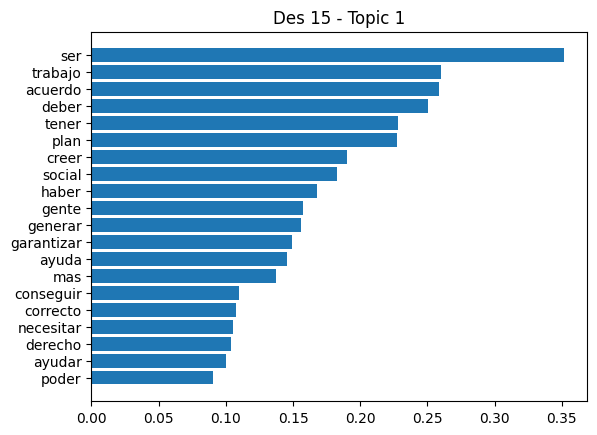

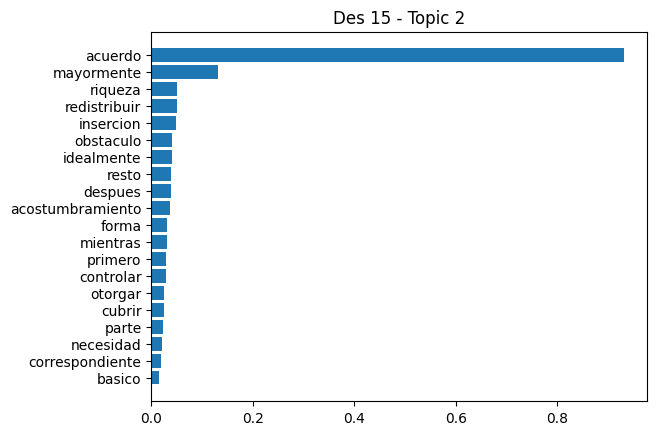

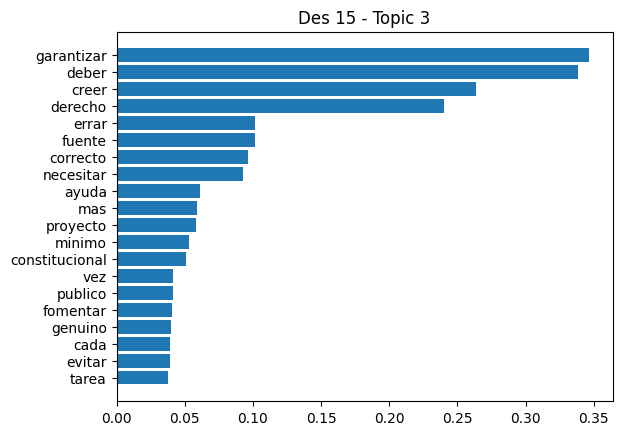

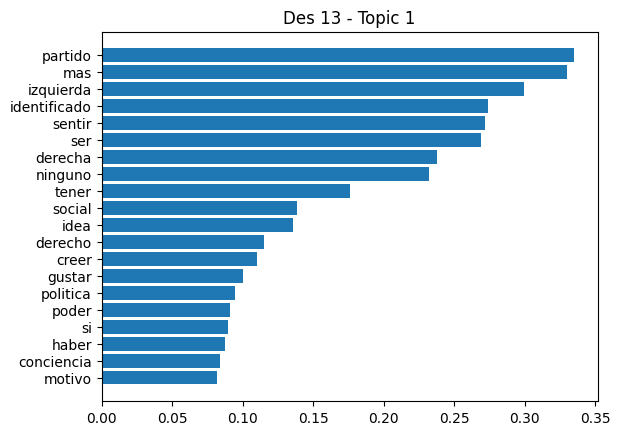

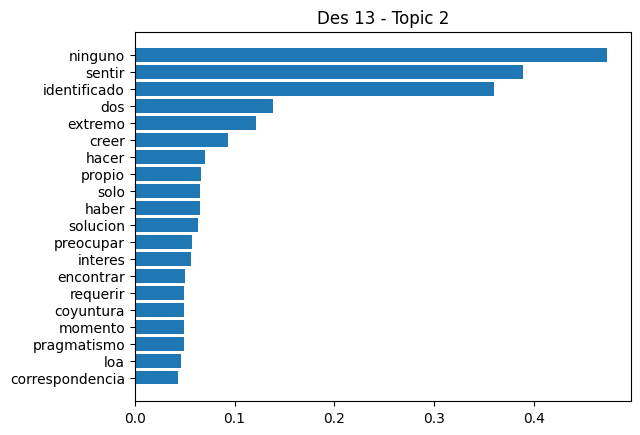

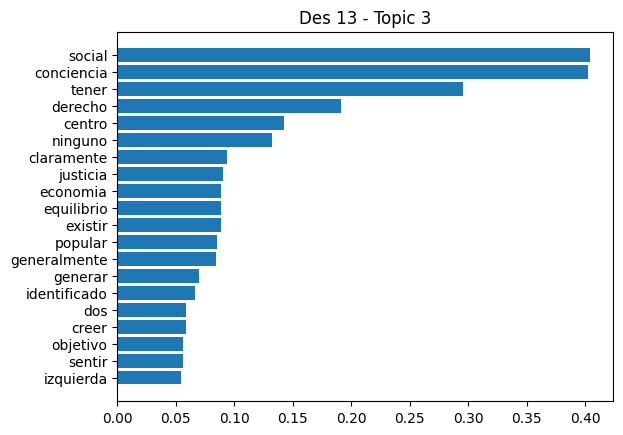

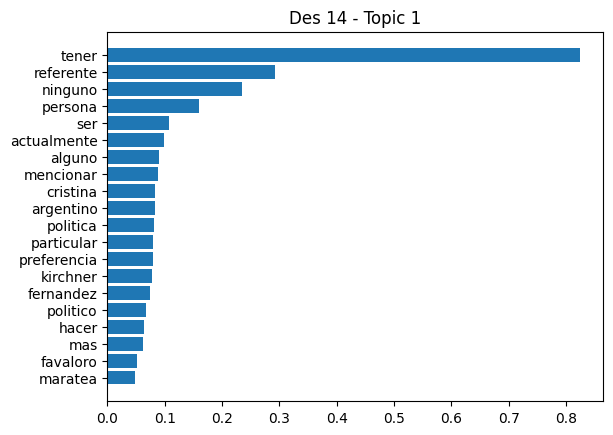

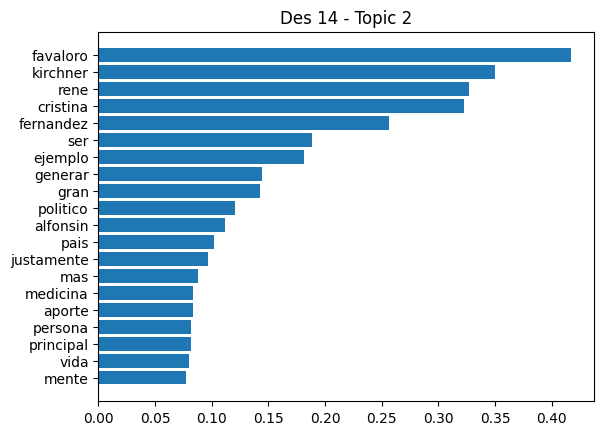

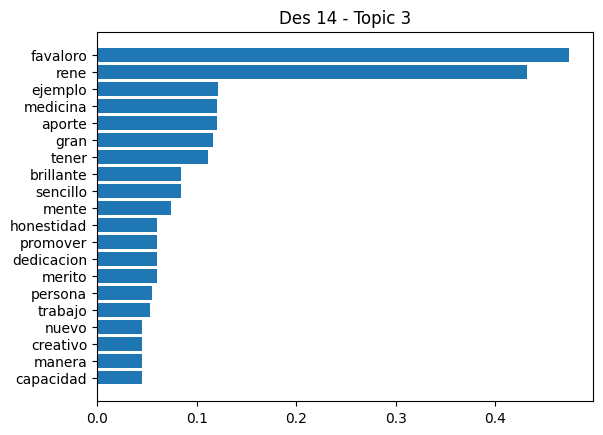

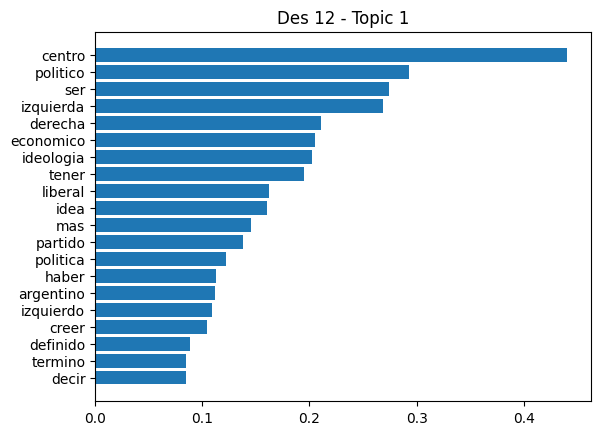

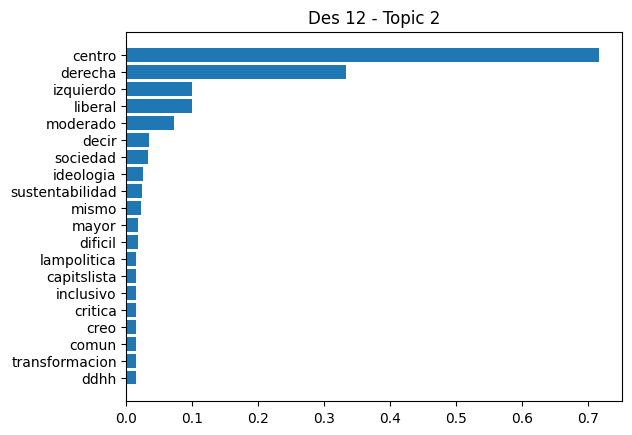

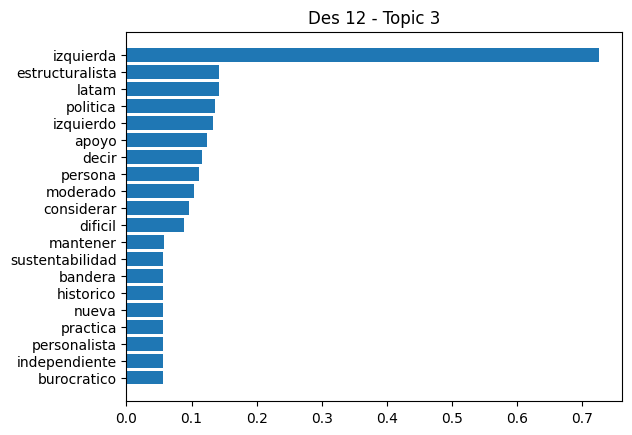

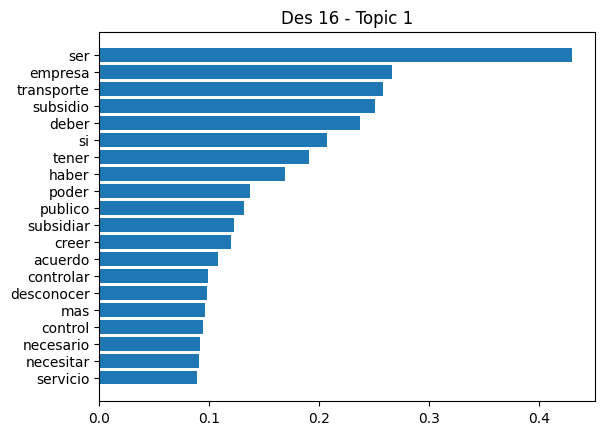

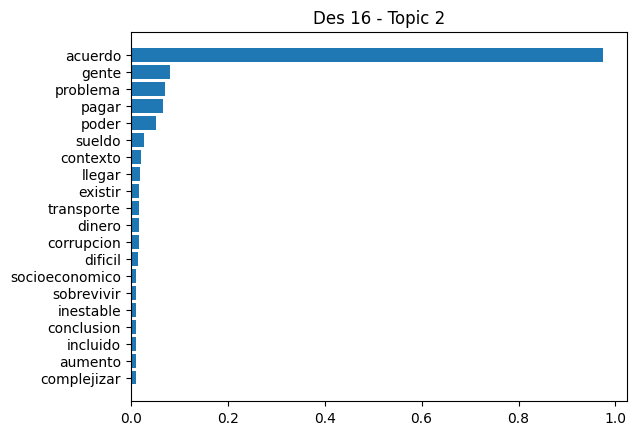

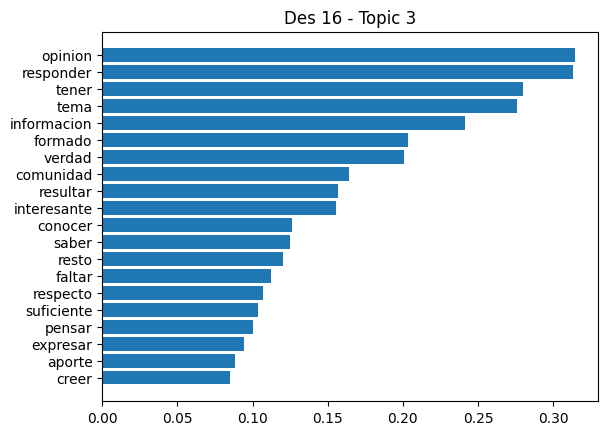

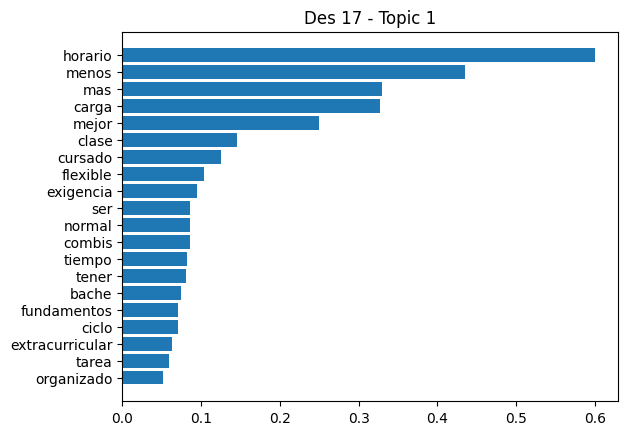

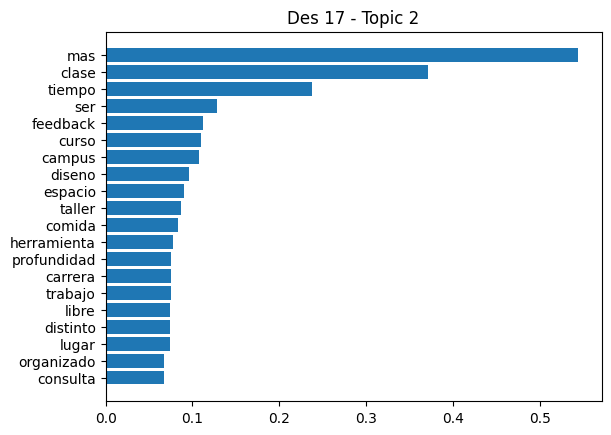

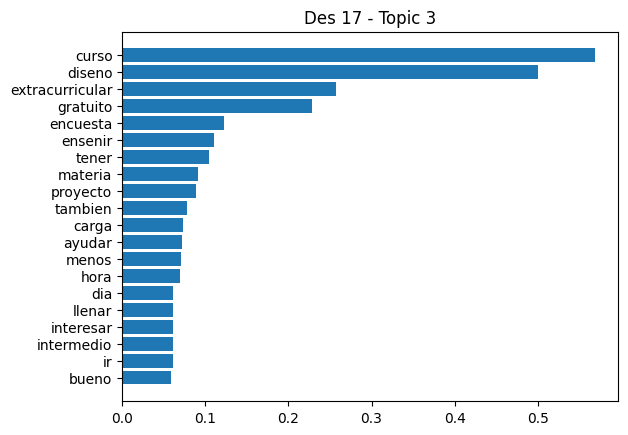

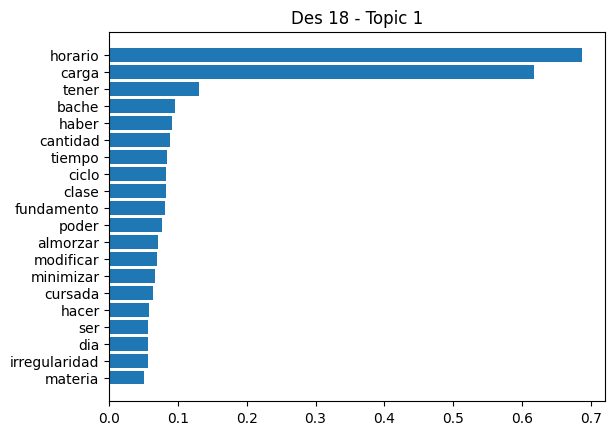

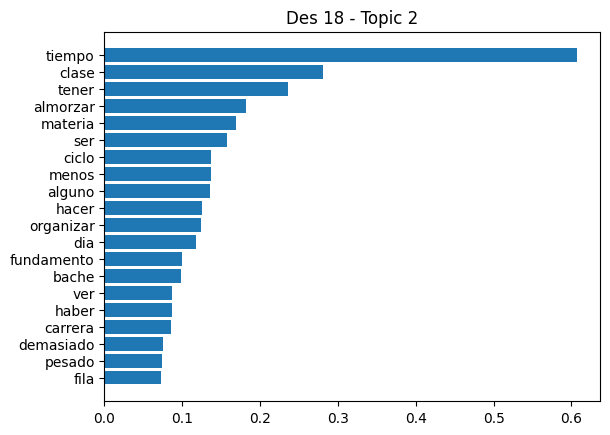

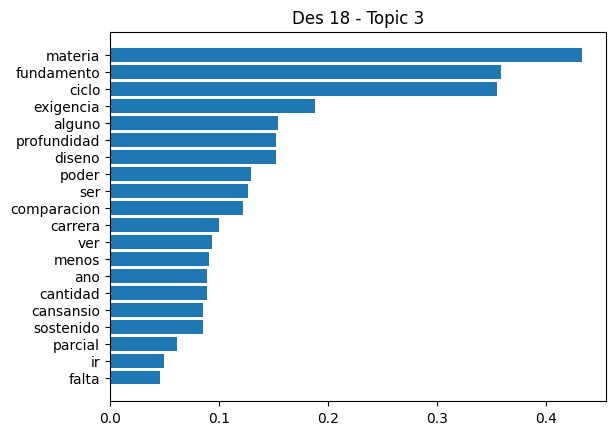

In [12]:
# Define data and model

n_components = 3 # nro de topicos a encontrar por desafío

for des, textos in df_desafio.items():
    
    documents = [' '.join(t) for t in textos]
    model = TruncatedSVD

    words, wheights = words_wheights(model, documents, n_components)


    for i in range(n_components):
        plot_word(words[i], wheights[i], plot_title = f'Des {des} - Topic {i+1}')

### Evaluacion

Recordemos que la cantidad de tópicos a encontrar es un hiperparametro. Para encontrar la cantidad óptima de tópicos, podemos realizar los siguientes pasos:

1. aumentar iterativamente la cantidad de tópicos a encontrar
2. evaluar la similitud coseno promedio entre todos los pares de tópicos (cuantos mas tópicos, menor sera la similitud promedio)
3. graficar la relacion entre cantidad de tópicos y similitud entre ellos
4. decidir el numero optimo de tópicos

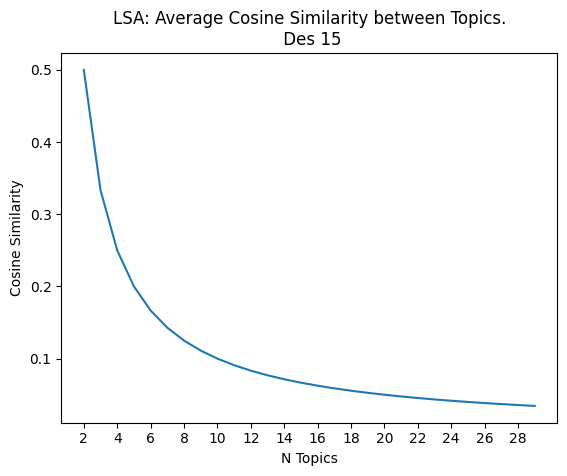

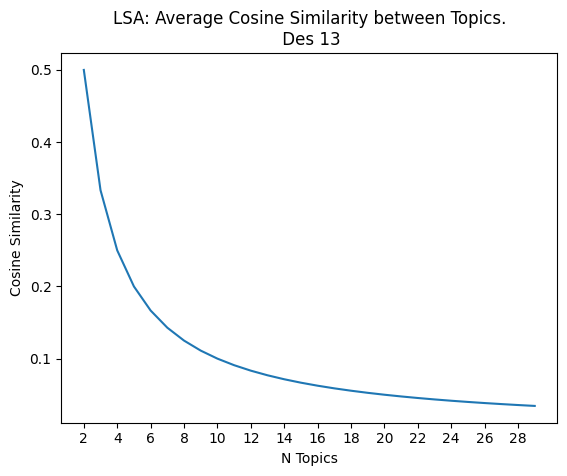

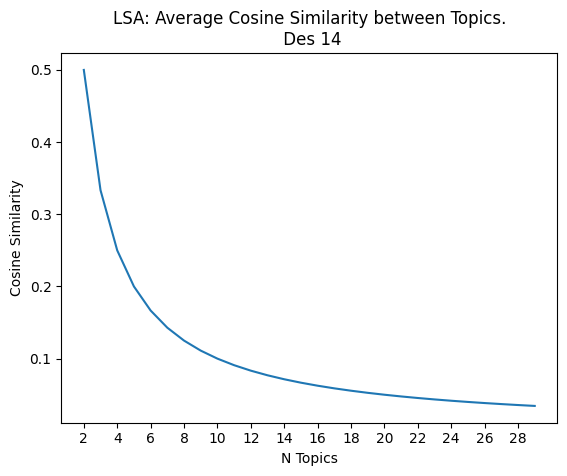

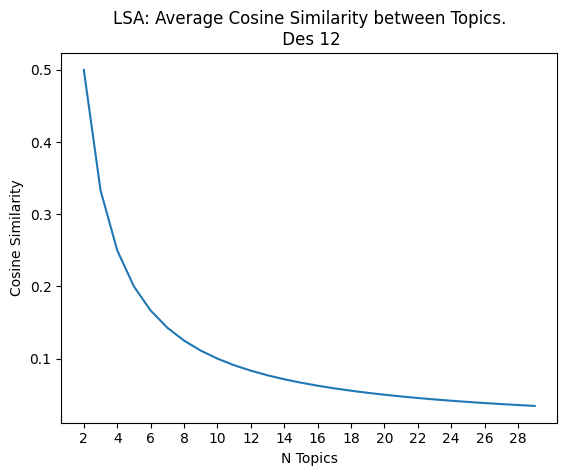

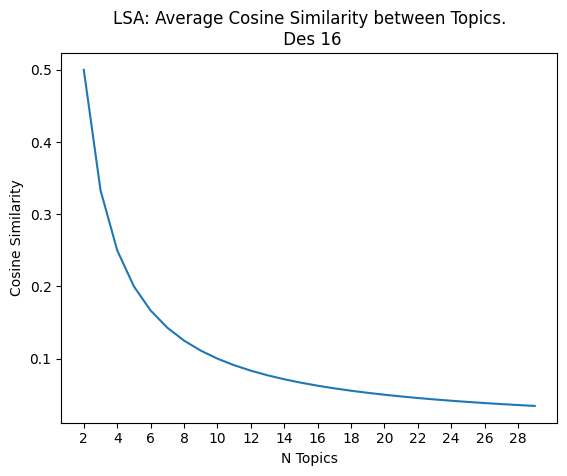

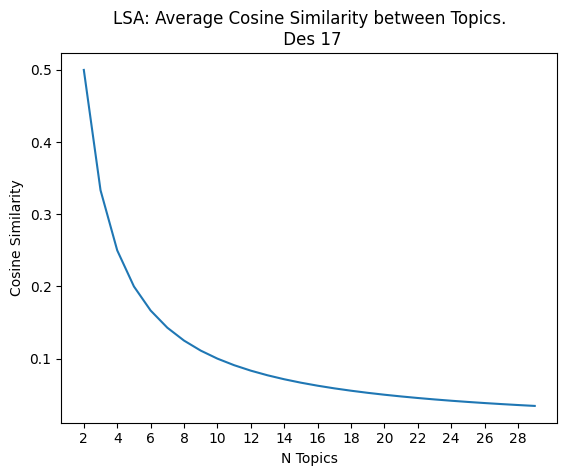

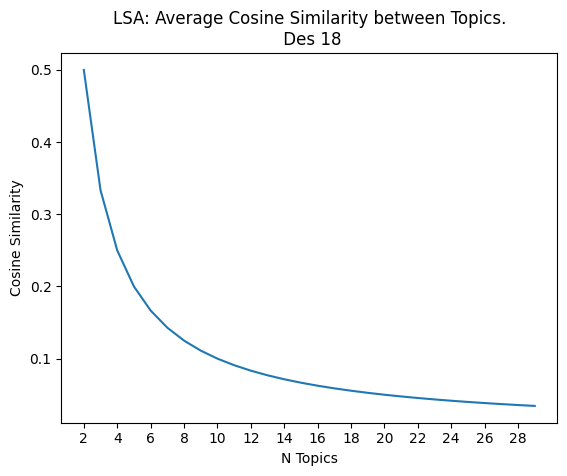

In [13]:
for des, textos in df_desafio.items():
    
    documents = [' '.join(t) for t in textos]
    
    n_topics = 30

    all_cs = []
    for i in range(2, n_topics):
        mean_cos_simil = evaluate_coherence(model, documents, n_topics = i)
        all_cs.append(mean_cos_simil)

    plt.plot(range(2, n_topics), all_cs)
    plt.title(f'LSA: Average Cosine Similarity between Topics.\n Des {des}')
    plt.xlabel('N Topics')
    plt.ylabel('Cosine Similarity')
    plt.xticks(range(2, n_topics, 2), range(2, n_topics, 2))
    plt.show()

Reducimos la dimensionalidad de los topicos en dos dimensiones y graficamos su distribucion

Every topic with its most relevant words.


Topic 0 = ser, trabajo, acuerdo

Topic 1 = acuerdo, mayormente, riqueza

Topic 2 = garantizar, deber, creer

Topic 3 = correcto, gente, querer



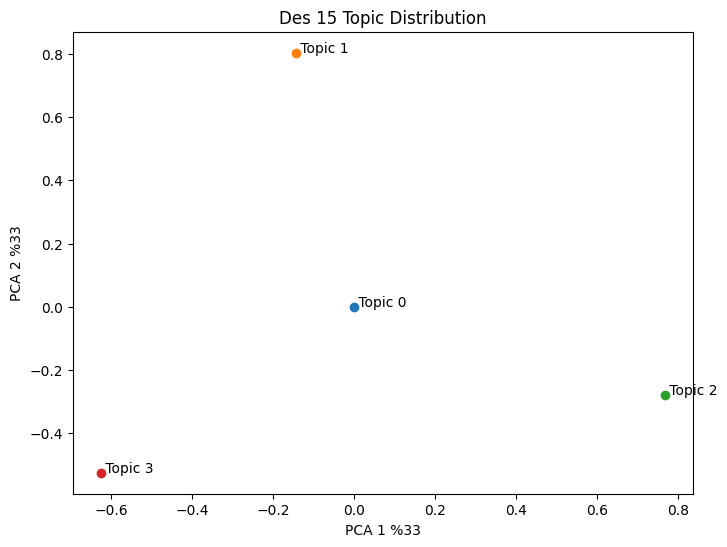

Every topic with its most relevant words.


Topic 0 = partido, mas, izquierda

Topic 1 = ninguno, sentir, identificado

Topic 2 = social, conciencia, tener

Topic 3 = ideologia, derecha, centro



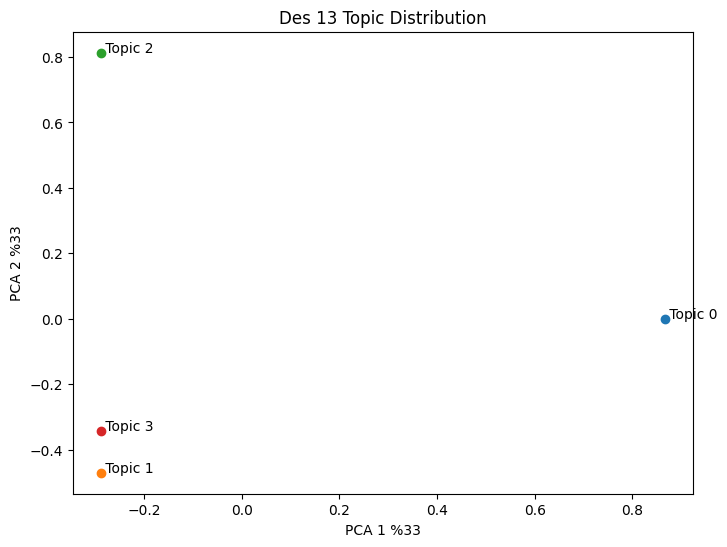

Every topic with its most relevant words.


Topic 0 = tener, referente, ninguno

Topic 1 = favaloro, kirchner, rene

Topic 2 = favaloro, rene, aporte

Topic 3 = ninguno, messi, actualmente



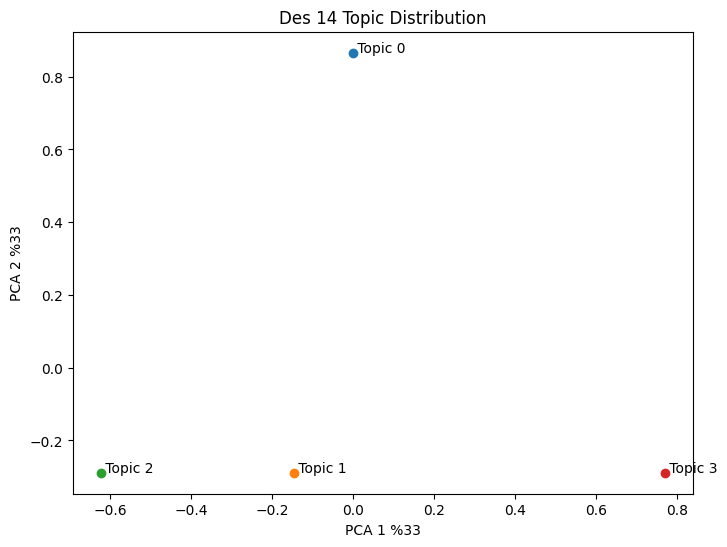

Every topic with its most relevant words.


Topic 0 = centro, politico, ser

Topic 1 = centro, derecha, izquierdo

Topic 2 = izquierda, estructuralista, latam

Topic 3 = peronista, hacer, pais



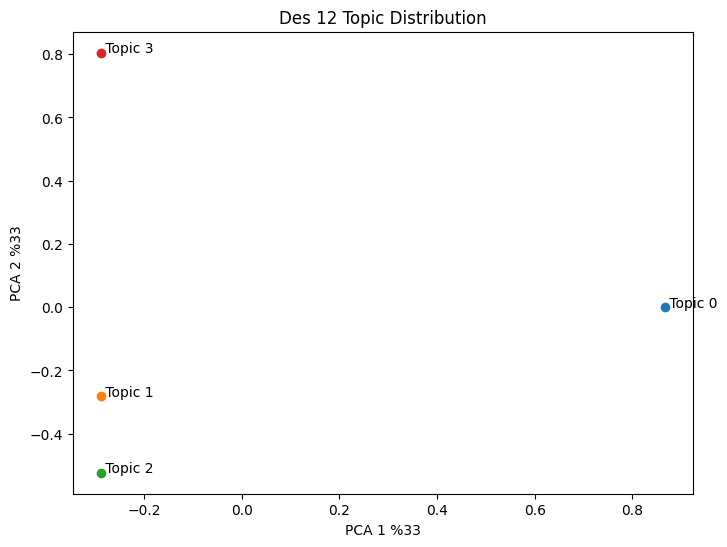

Every topic with its most relevant words.


Topic 0 = ser, empresa, transporte

Topic 1 = acuerdo, gente, problema

Topic 2 = opinion, responder, tener

Topic 3 = ser, subsidiar, bien



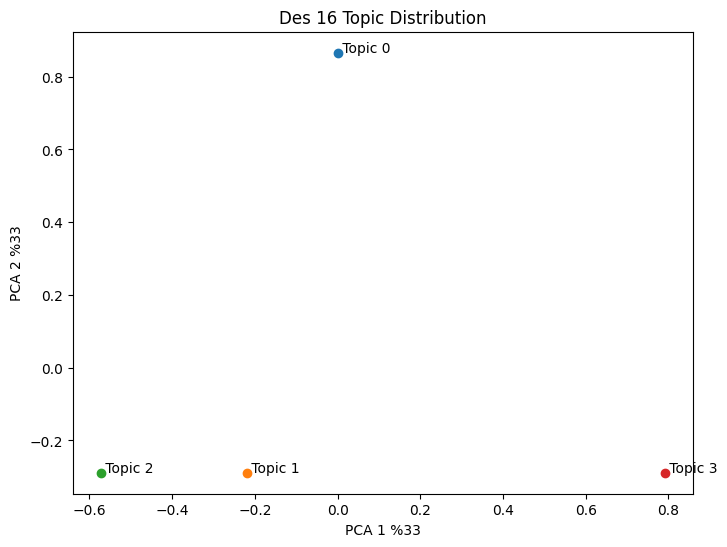

Every topic with its most relevant words.


Topic 0 = horario, menos, mas

Topic 1 = mas, clase, tiempo

Topic 2 = curso, diseno, extracurricular

Topic 3 = comida, kiosco, harina



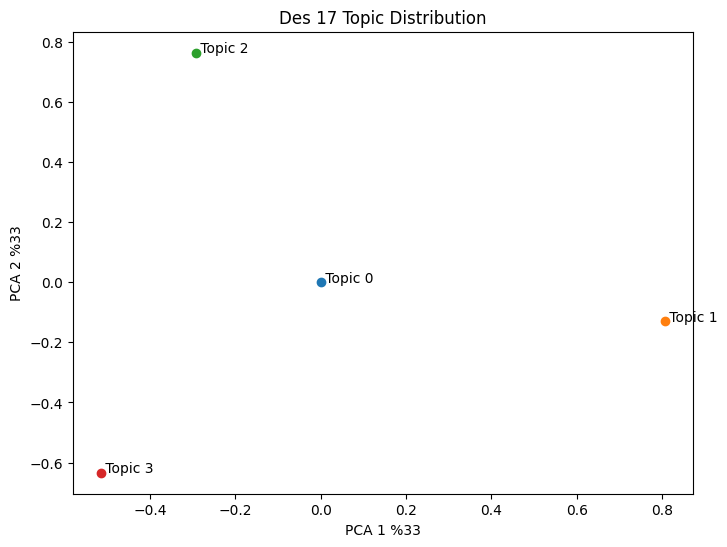

Every topic with its most relevant words.


Topic 0 = horario, carga, tener

Topic 1 = tiempo, clase, tener

Topic 2 = materia, fundamento, ciclo

Topic 3 = tiempo, ciclo, fundamento



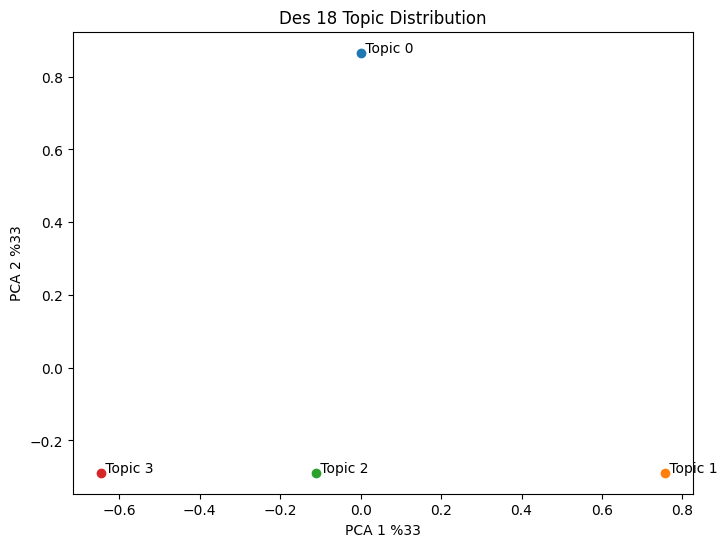

In [14]:
for des, textos in df_desafio.items():
    
    documents = [' '.join(t) for t in textos]
    
    num_top_words = 3

    visualize_topics(model, documents, num_top_words, n_components = 4, des=des) 

## 2. Latent Dirichlet  Allocation

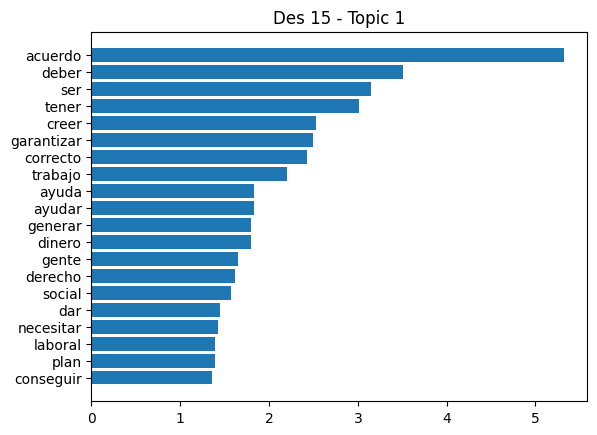

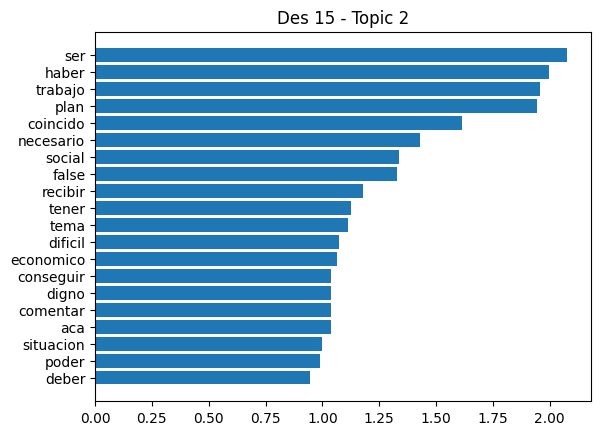

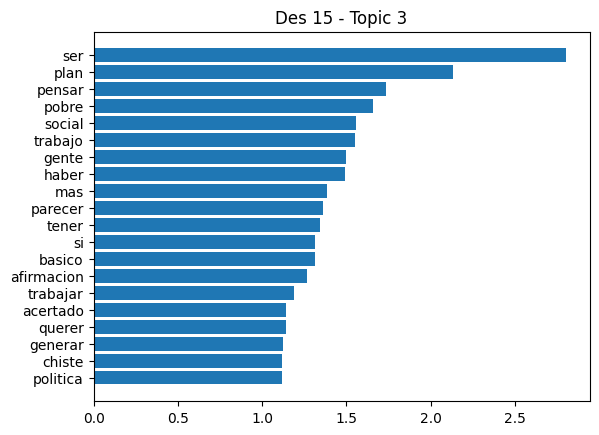

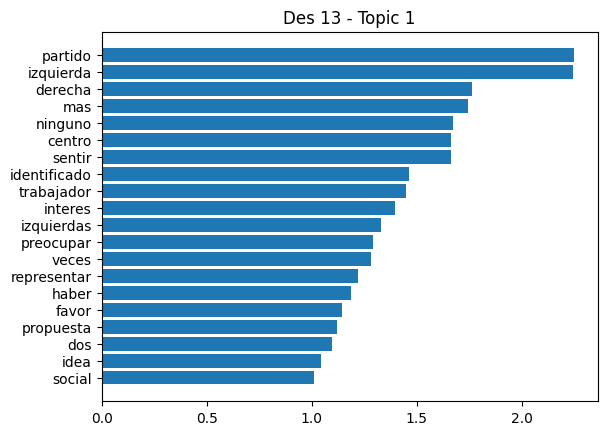

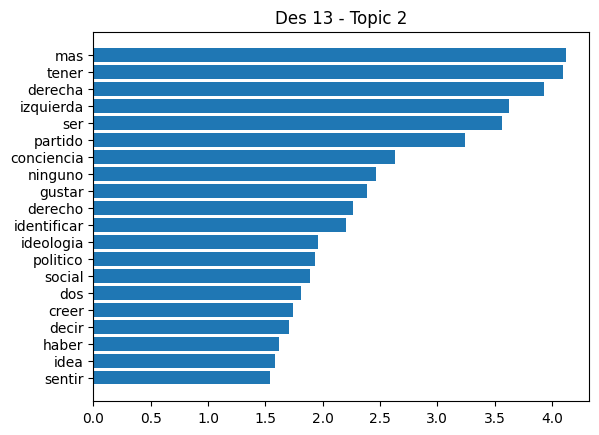

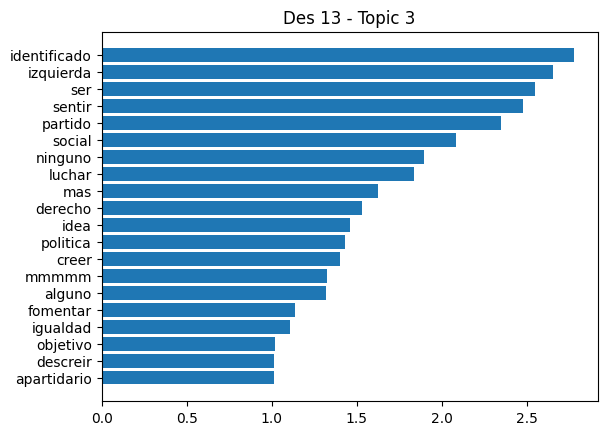

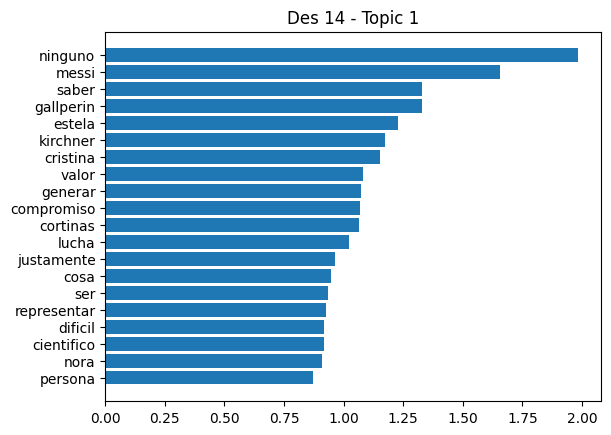

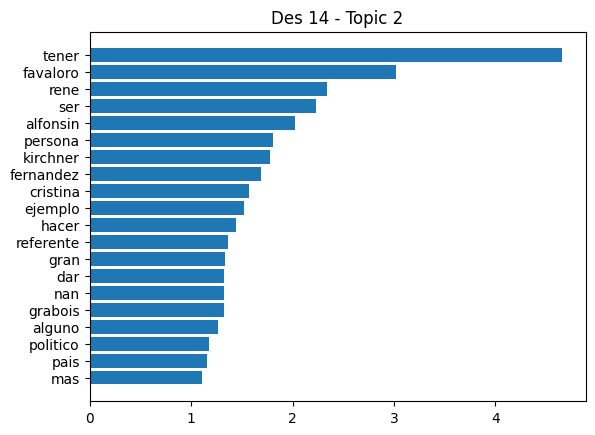

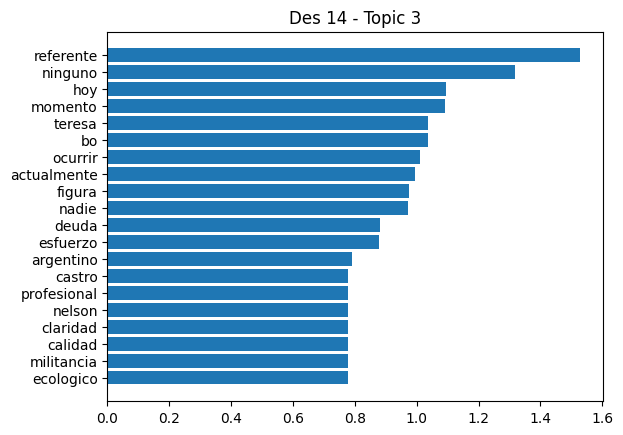

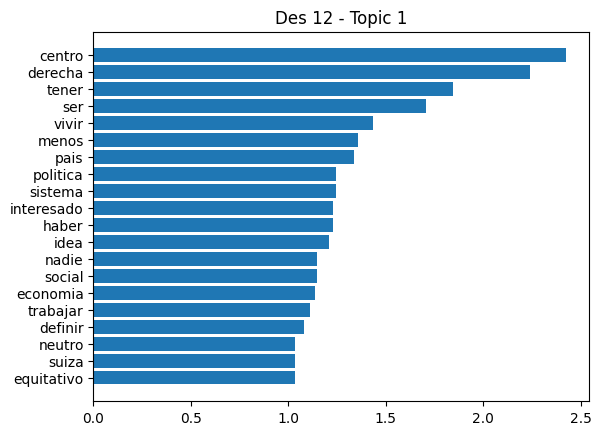

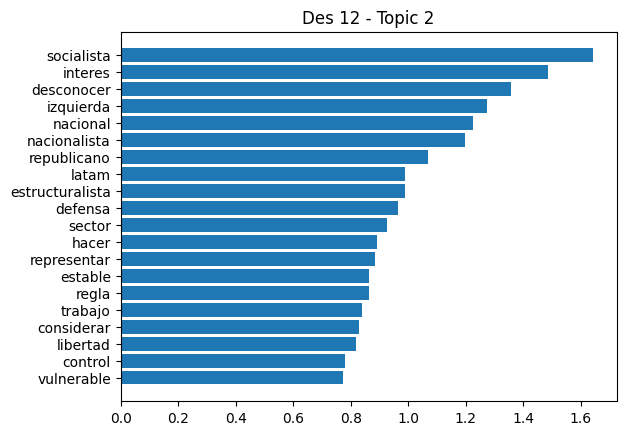

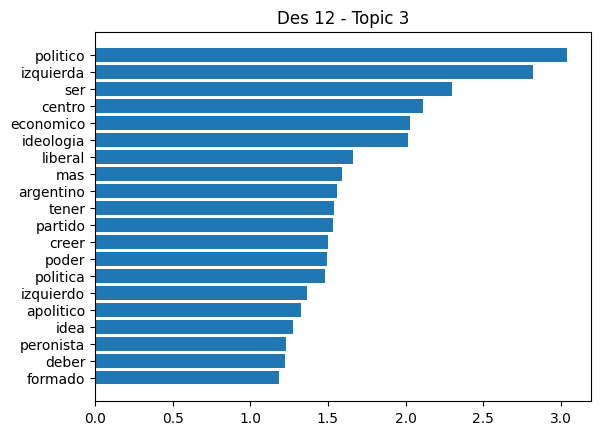

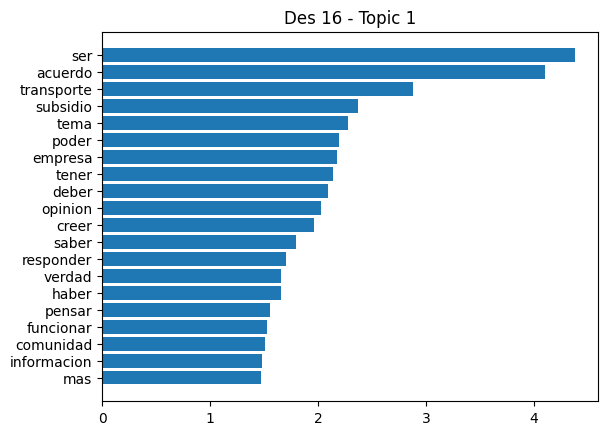

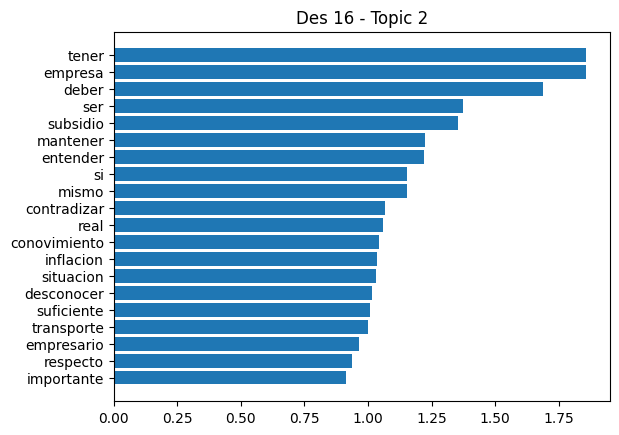

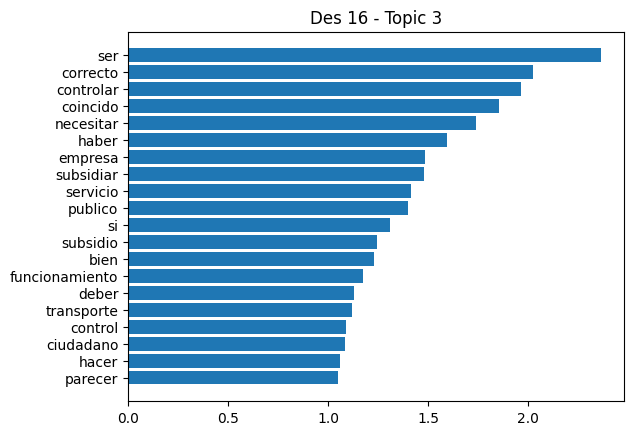

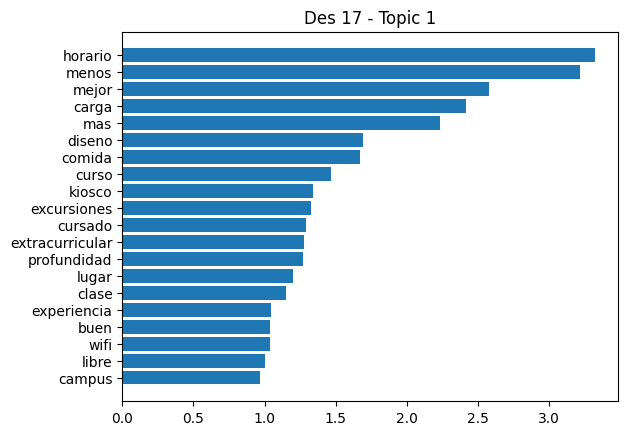

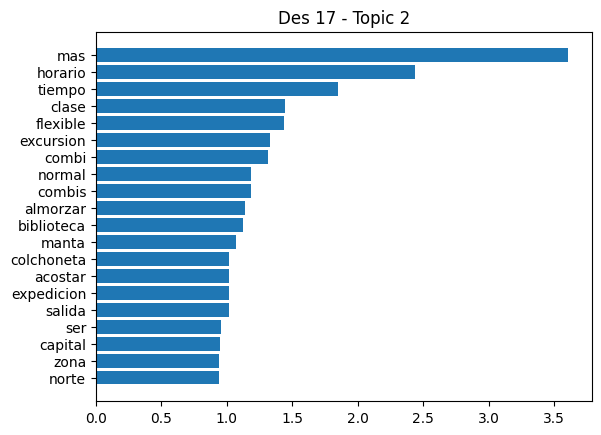

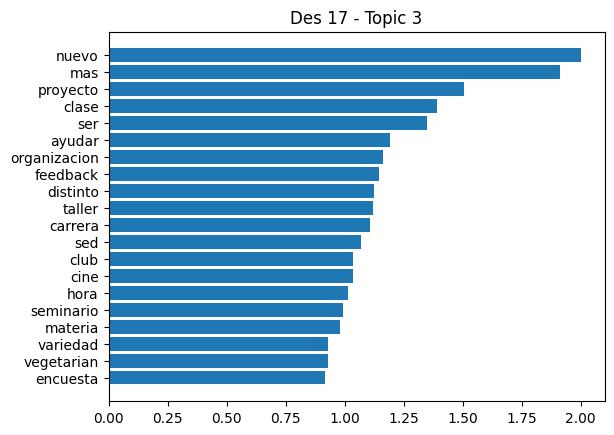

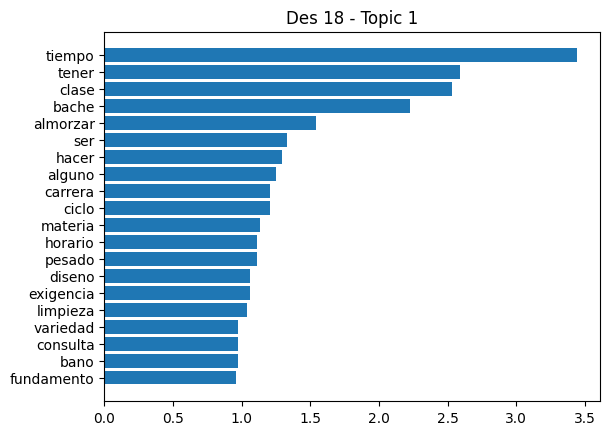

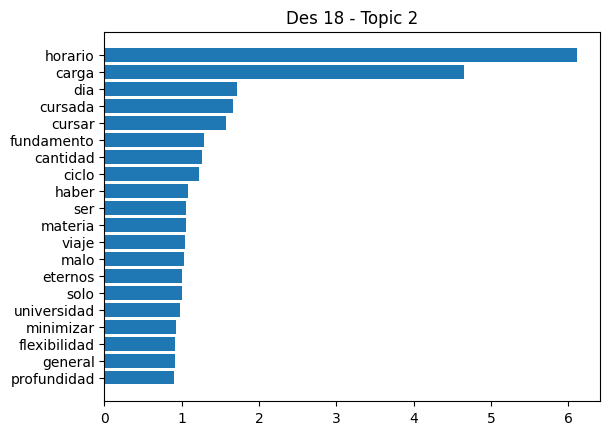

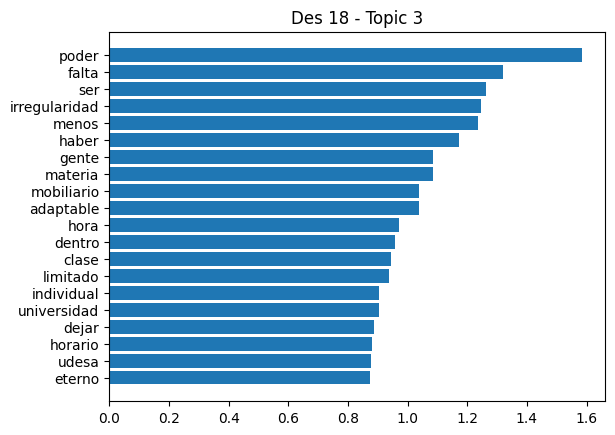

In [15]:
# Define data and model

n_components = 3

for des, textos in df_desafio.items():
    
    documents = [' '.join(t) for t in textos]
    model = LatentDirichletAllocation
    

    words, wheights = words_wheights(model, documents, n_components)
    
    for i in range(n_components):
        plot_word(words[i], wheights[i], plot_title = f'Des {des} - Topic {i+1}')

### Evaluacion

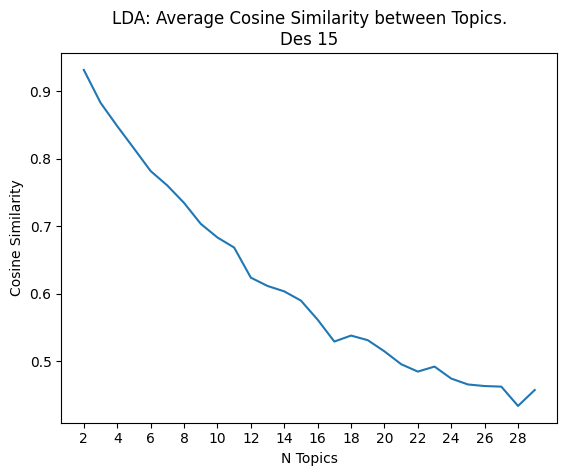

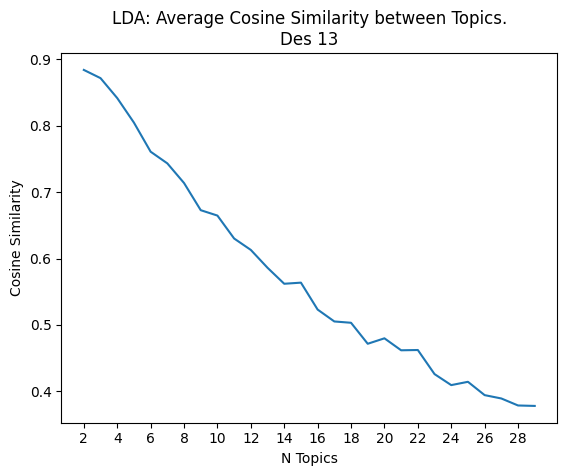

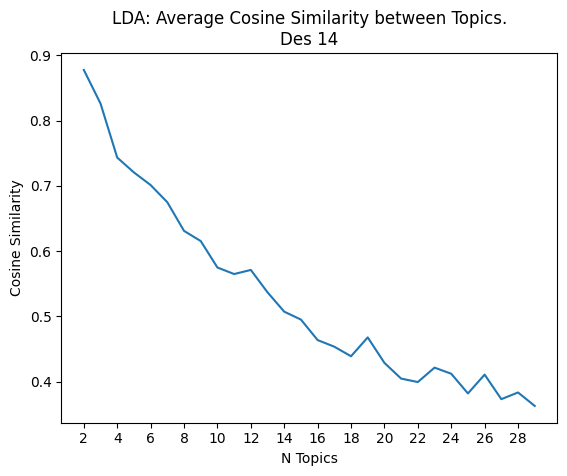

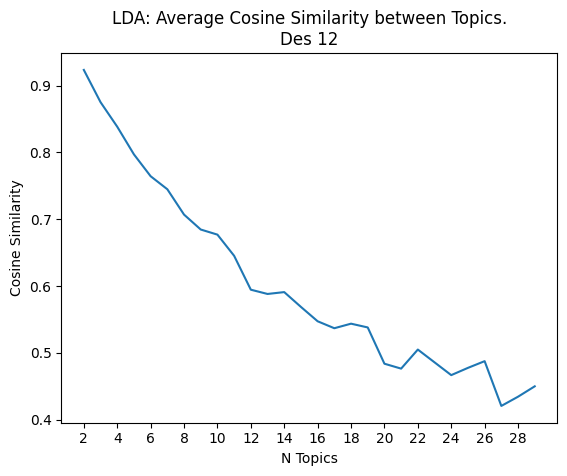

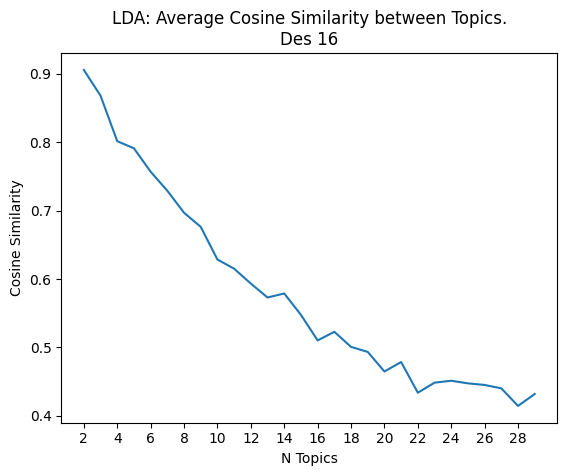

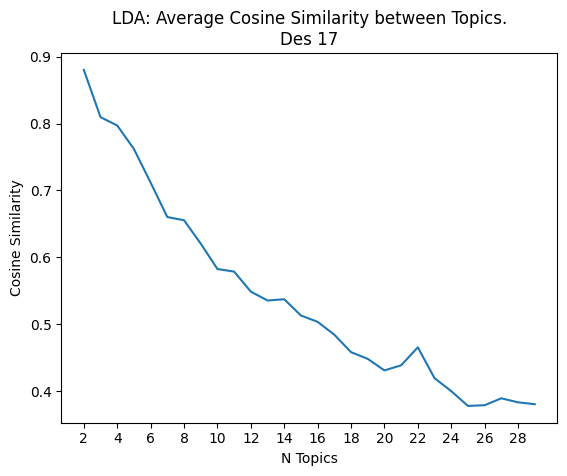

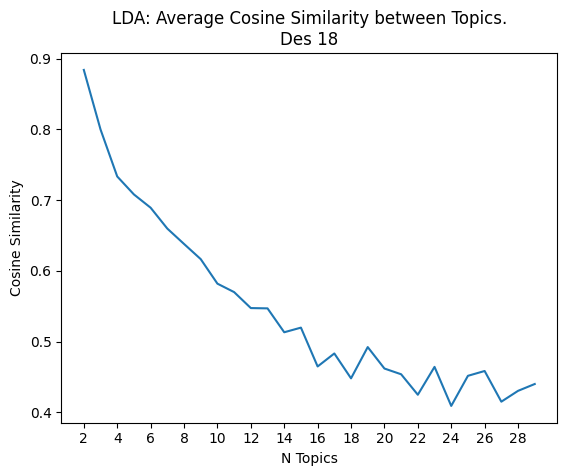

In [16]:
for des, textos in df_desafio.items():
    
    # Define data
    documents = [' '.join(t) for t in textos]

    n_topics = 30

    all_cs = []
    for i in range(2, n_topics):
        mean_cos_simil = evaluate_coherence(model, documents, n_topics = i)
        all_cs.append(mean_cos_simil)

    plt.plot(range(2, n_topics), all_cs)
    plt.title(f'LDA: Average Cosine Similarity between Topics.\nDes {des}')
    plt.xlabel('N Topics')
    plt.ylabel('Cosine Similarity')
    plt.xticks(range(2, n_topics, 2), range(2, n_topics, 2))
    plt.show()

Every topic with its most relevant words.


Topic 0 = acuerdo, ser, correcto, creer

Topic 1 = tener, haber, ser, acuerdo

Topic 2 = haber, mmmmmmmmmm, necesitar, bien

Topic 3 = ser, deber, trabajo, tener



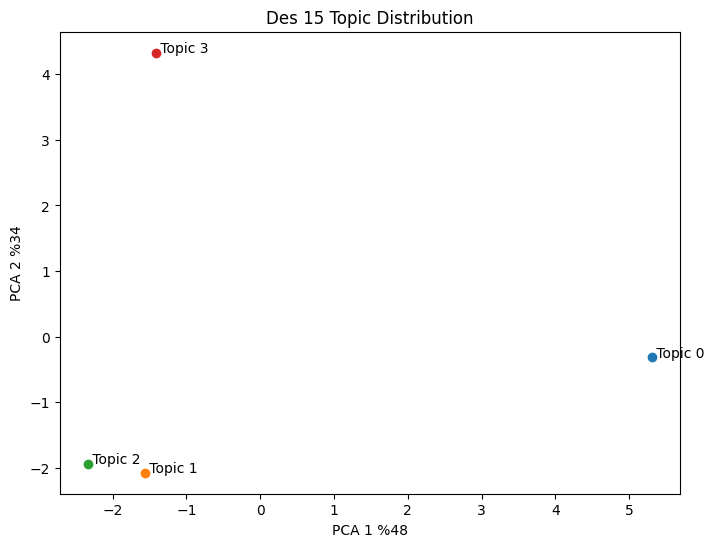

Every topic with its most relevant words.


Topic 0 = ninguno, sentir, identificado, partido

Topic 1 = derecho, partido, sector, social

Topic 2 = mas, ser, partido, izquierda

Topic 3 = izquierda, derecha, mas, ser



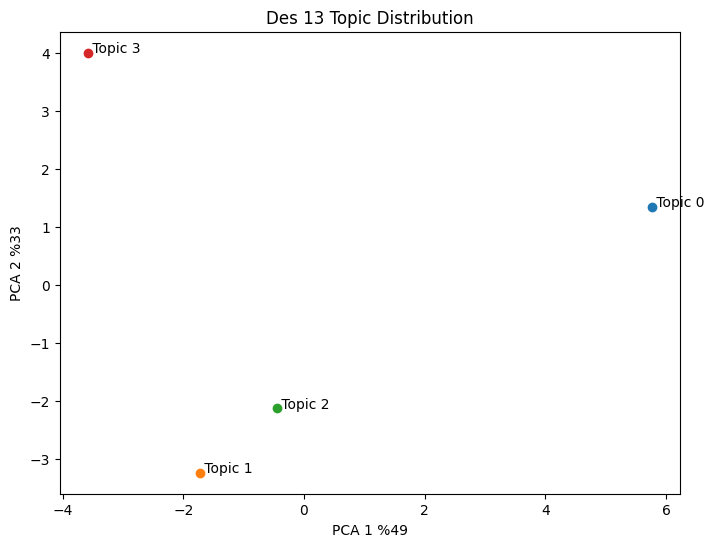

Every topic with its most relevant words.


Topic 0 = tener, ninguno, referente, nadie

Topic 1 = alfonsin, dar, generar, compromiso

Topic 2 = ser, hacer, grabois, nan

Topic 3 = favaloro, rene, kirchner, cristina



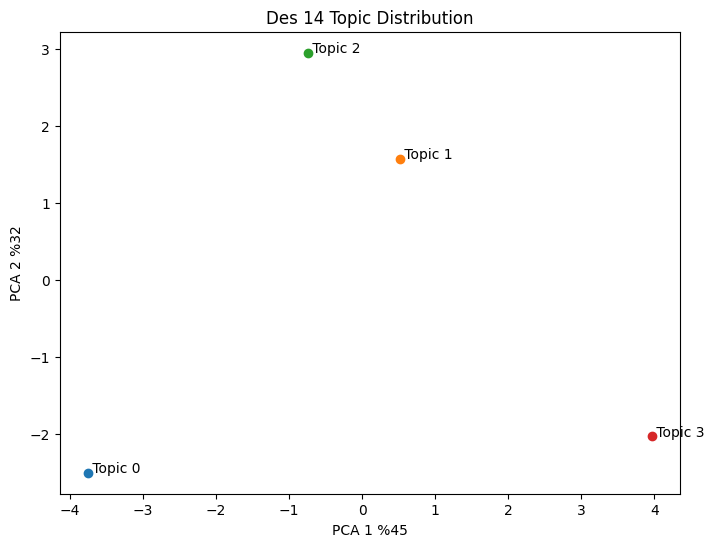

Every topic with its most relevant words.


Topic 0 = desconocer, apolitico, regular, equitativo

Topic 1 = tener, mas, ser, politica

Topic 2 = centro, politico, izquierda, ser

Topic 3 = derecha, izquierda, peronista, centro



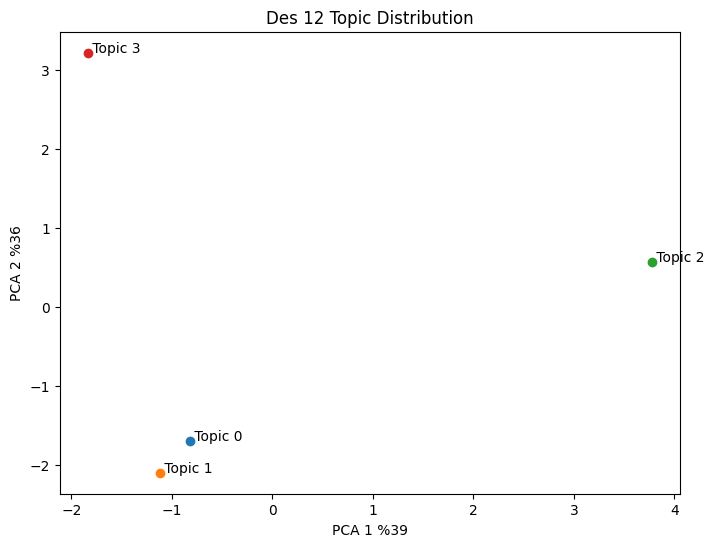

Every topic with its most relevant words.


Topic 0 = ser, empresa, correcto, verdad

Topic 1 = ser, creer, tener, deber

Topic 2 = acuerdo, transporte, ser, funcionar

Topic 3 = ser, subsidio, coincido, deber



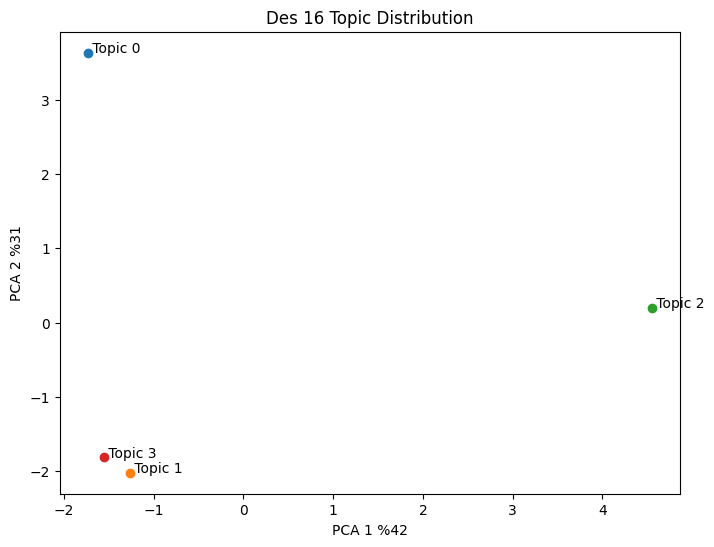

Every topic with its most relevant words.


Topic 0 = mejor, mas, horario, clase

Topic 1 = tiempo, mas, nuevo, feria

Topic 2 = mas, taller, diseno, opcion

Topic 3 = horario, mas, carga, menos



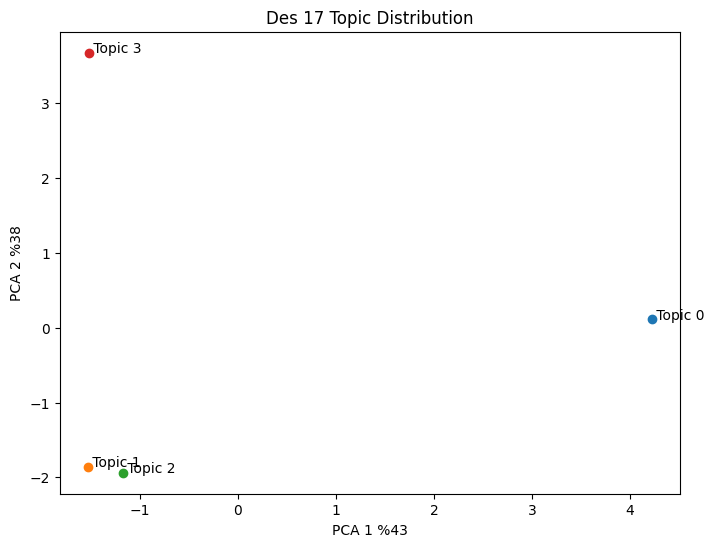

Every topic with its most relevant words.


Topic 0 = ser, tener, materia, horario

Topic 1 = bache, horario, irregularidad, hora

Topic 2 = cursar, capaz, tener, poder

Topic 3 = horario, carga, tiempo, cantidad



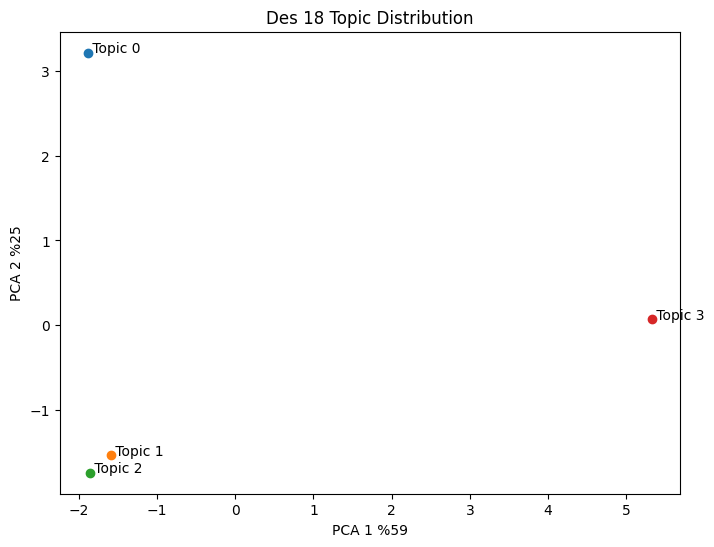

In [17]:
for des, textos in df_desafio.items():
    
    # Define data
    documents = [' '.join(t) for t in textos]

    num_top_words = 4

    visualize_topics(model, documents, num_top_words, n_components=4, des=des)

## 3. BERTopic 

- [Documentation](https://maartengr.github.io/BERTopic/api/bertopic.html)
- [Friendly Documentation](https://maartengr.github.io/BERTopic/index.html)
- [Use Case Example](https://www.pinecone.io/learn/bertopic/)

In [18]:
# dict with desafio and its preprocesed texts

pp = Preprocess(lemma=False)

df_desafio = {}

for des in df.desafio.unique():
    value = df[df['desafio']==des].texto.tolist()
    value = pp.preprocess(value)
    value = [' '.join(d) for d in value]
    df_desafio[des] = value

In [19]:
from IPython.display import display, Markdown

def bertopic_plots(model, documents, des):
    
    """
    This function plots every relevant BERTopic plot. 
    
    Input:
    a. model: BERTopic
    b. documents: preprocessed
    c. des: name of desafio
    
    Output: none
    
    """
    
    
    topics, probs = model.fit_transform(documents)
    
    
    
    # Define the text to display
    text = f'<div style="text-align:center;"><span style="font-size:48px;color:blue;">Desafío {des}</span></div>'

    # Get the unique Topics and their frequencies
    unique_elements, counts = np.unique(topics, return_counts=True)
    
    plt.bar(unique_elements, counts)
    
    # Add axis labels and a title
    plt.xlabel('Topic')
    plt.ylabel('Frequency (N of documents)')
    plt.xticks(unique_elements)
    plt.title(f'Frequency of each Topic\nDes {des}')

    # Visualize topics
    fig_vt = model.visualize_topics()

    # Importance of each word
    fig_w = model.visualize_barchart(top_n_topics=len(model.get_topics()))
    
    # Vistualize documents
    fig_vd = model.visualize_documents(documents, hide_annotations=True)
    
    # Heatmap topics
    fig_hm = model.visualize_heatmap()

    #Show images
    print('\n\n')
    display(Markdown(text))
    
    plt.show()
    fig_vt.show()
    fig_w.show()
    fig_vd.show()
    fig_hm.show()
    
    try:
        # Most representative documents
        pp = Preprocess(lemma=False)
        original_texts = df['texto'].values.tolist()
        prepro_texts = pp.preprocess(df['texto'])
        prepro_texts = [' '.join(d) for d in prepro_texts]

        for key, value in model.get_representative_docs().items():
            print('\n'*4),print(f'TOPIC {key} most representative documents:\n')
            for i, doc in enumerate(value):
                indice = prepro_texts.index(doc)
                print(f'{i+1}.\n {original_texts[indice]}\n\n')
    except:
        pass

In [20]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.cluster import MiniBatchKMeans

cluster_model = MiniBatchKMeans(n_clusters=4) # KNN como alternativa a HDBSCAN

def bert_model_create(cluster_model = None):
    embedding_model = SentenceTransformer('bert-base-nli-mean-tokens') # embedings pre entrenado en español
    umap_model = UMAP(n_neighbors=3)
    
    # Kmeans works better for small desafio, HDBSCAN for big ones
    if not cluster_model:
        cluster_model = HDBSCAN(gen_min_span_tree=True, prediction_data=True)

    # Bag of words
    vectorizer_model = CountVectorizer(ngram_range=(1, 3))
    
    model = BERTopic(
        vectorizer_model = vectorizer_model,
        umap_model = umap_model,
        hdbscan_model = cluster_model,
        embedding_model = embedding_model,
        language='spanish',
        calculate_probabilities=True,
        verbose=True,
        min_topic_size = 3,            # most important hyperparameter for small dataset (lower it)
        nr_topics="auto"
    )
    
    return model

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2022-12-21 11:51:33,527 - BERTopic - Transformed documents to Embeddings
2022-12-21 11:51:35,102 - BERTopic - Reduced dimensionality
2022-12-21 11:51:35,111 - BERTopic - Clustered reduced embeddings
2022-12-21 11:51:36,441 - BERTopic - Reduced number of topics from 4 to 4
C:\Users\Felipe\miniconda3\lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:1592: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


TypeError: Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.

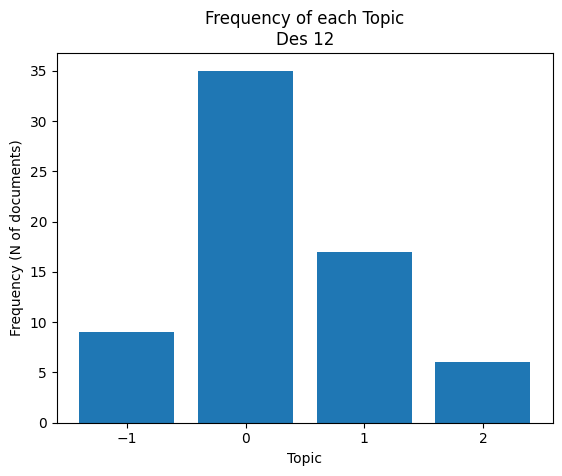

In [22]:
key = '12'

documents = df_desafio[key]

model = bert_model_create()
bertopic_plots(model, documents, key)

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2022-12-21 11:52:09,020 - BERTopic - Transformed documents to Embeddings
2022-12-21 11:52:10,331 - BERTopic - Reduced dimensionality
2022-12-21 11:52:10,342 - BERTopic - Clustered reduced embeddings
2022-12-21 11:52:12,514 - BERTopic - Reduced number of topics from 8 to 8


<div style="text-align:center;"><span style="font-size:48px;color:blue;">Desafío 13</span></div>

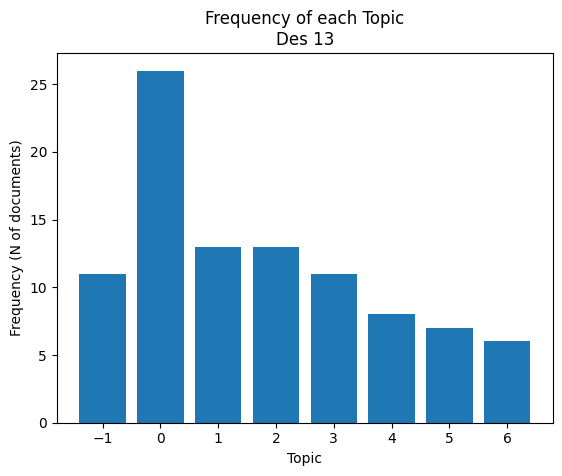






TOPIC 3 most representative documents:

1.
 Me siento identificada socialmente con partidos de izquierda pero económicamente con partidos de centro. Nada de derecha. Pienso que tenemos que abogar por las libertades sociales pero a la vez económicamente no se puede librar todo a la suerte del mercado, así que creo que se necesita algún control


2.
 Izquierda en lo que respecta a mi desprecio al capitalismo.Derecha porque soy antidelincuencia.


3.
 Socialmente, de centro-izquierda. Economicamente, de centro-derecha.







TOPIC 6 most representative documents:

1.
 Podría decirse que mas de derecha. En general son por motivos económicos por sobre todo. Tambien pesa bastante la mala experiencia con partidos de "izquierda" en la Argentina, si bien coincido con varias premisas que plantean, la implementación y corrupción subyacente me han hecho reacio a identificarme con ellos.


2.
 Con partidos de centro izquierda. La derecha limita derechos para las mayorías populares y si bien l

In [23]:
key = '13'

documents = df_desafio[key]

model = bert_model_create()
bertopic_plots(model, documents, key)

In [ ]:
key = '14'

documents = df_desafio[key]


cluster_model = MiniBatchKMeans(n_clusters=4) # Probamos con KNN


model = bert_model_create(cluster_model)
bertopic_plots(model, documents, key)

In [ ]:
key = '15'

documents = df_desafio[key]

model = bert_model_create()
bertopic_plots(model, documents, key)

In [ ]:
key = '16'

documents = df_desafio[key]

cluster_model = MiniBatchKMeans(n_clusters=4) # Probamos con KNN

model = bert_model_create(cluster_model)
bertopic_plots(model, documents, key)

In [ ]:
key = '17'

documents = df_desafio[key]

cluster_model = MiniBatchKMeans(n_clusters=4) # Probamos con KNN

model = bert_model_create(cluster_model)
bertopic_plots(model, documents, key)

In [ ]:
key = '18'

documents = df_desafio[key]

cluster_model = MiniBatchKMeans(n_clusters=4) # Probamos con KNN

model = bert_model_create(cluster_model)
bertopic_plots(model, documents, key)